<a href="https://colab.research.google.com/github/KAMAL0657/KAMAL-HUSSAIN/blob/main/Kamal_Hussain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kamal Hussain — Python Assignment

**File:** `Kamal_Hussain_Python_Assignment.ipynb`

**Contents:** PCA, Imbalanced Classification, Feature Engineering, ML Workflow.



In [40]:
# Install required packages (uncomment if running in Colab)
# !pip install imbalanced-learn scikit-learn pandas matplotlib seaborn nbformat

print("Run this cell only if packages are missing in your environment.")

Run this cell only if packages are missing in your environment.


# Part A — Principal Component Analysis (10 Questions)

Datasets used: synthetic (numpy), Iris (sklearn), Titanic (seaborn), blobs/moons (sklearn).

### A1. Center data and compute covariance matrix (NumPy)
**Theory:** Centering subtracts the mean per feature; covariance shows how features vary together.

**Code:** Create a synthetic 2D dataset and compute mean-centered covariance matrix.

In [41]:
import numpy as np

# Synthetic 2D dataset
np.random.seed(0)
X = np.random.randn(100,2) * [2.0, 0.5] + [1.0, -1.0]

# Centering
X_mean = X.mean(axis=0)
X_centered = X - X_mean

# Covariance (manual and numpy)
cov_manual = (X_centered.T @ X_centered) / (X_centered.shape[0] - 1)
cov_numpy = np.cov(X, rowvar=False)

X_mean, cov_manual, cov_numpy

(array([ 0.99808464, -0.92861067]),
 array([[ 4.21978966, -0.02517201],
        [-0.02517201,  0.26057599]]),
 array([[ 4.21978966, -0.02517201],
        [-0.02517201,  0.26057599]]))

### A2. Extract eigenvalues and eigenvectors manually
Compute eigen-decomposition of the covariance matrix and sort components.

In [42]:
# Eigen-decomposition
eigvals, eigvecs = np.linalg.eigh(cov_manual)

# Sort descending
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

eigvals_sorted, eigvecs_sorted

(array([4.21994969, 0.26041596]),
 array([[-0.99997979, -0.00635745],
        [ 0.00635745, -0.99997979]]))

### A3. Implement PCA from scratch (eigen-decomposition) on a synthetic 3D dataset
**Output:** project to 2D and reconstruct back using top 2 components.

In [43]:
# Synthetic 3D dataset
np.random.seed(1)
X3 = np.random.randn(200,3) @ np.array([[2.0,0.3,0.2],[0.3,1.5,0.4],[0.2,0.4,0.8]]) + [0.5, -0.2, 1.0]

# Center
mu3 = X3.mean(axis=0)
X3c = X3 - mu3
cov3 = np.cov(X3c, rowvar=False)

# Eigendecomp
w3, v3 = np.linalg.eigh(cov3)
idx3 = np.argsort(w3)[::-1]
w3 = w3[idx3]
v3 = v3[:, idx3]

# Project to 2D (top 2)
W2 = v3[:, :2]
X3_proj = X3c @ W2

# Reconstruct from top2
X3_recon = X3_proj @ W2.T + mu3

X3_proj.shape, X3_recon.shape

((200, 2), (200, 3))

### A4. Use scikit-learn PCA to reduce Iris to 2D and plot
Load Iris from sklearn and plot species in 2D PCA space.

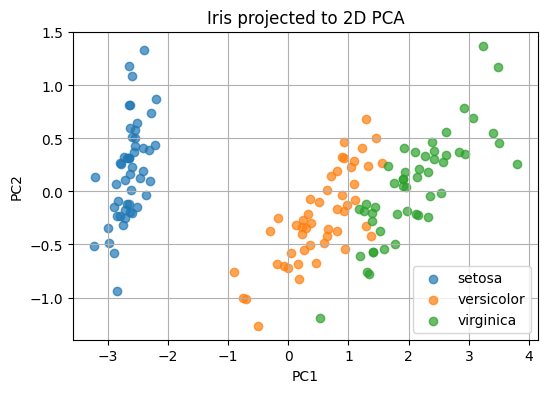

In [44]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

iris = datasets.load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target
species = iris.target_names

pca = PCA(n_components=2)
X_iris_p = pca.fit_transform(X_iris)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
for t,label in enumerate(species):
    mask = (y_iris == t)
    plt.scatter(X_iris_p[mask,0], X_iris_p[mask,1], label=label, alpha=0.7)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.legend(); plt.title('Iris projected to 2D PCA'); plt.grid(True)

### A5. Explained variance ratio (Iris)
Compute variance ratio and cumulative variance.

In [45]:
explained = pca.explained_variance_ratio_
explained, explained.cumsum()

(array([0.92461872, 0.05306648]), array([0.92461872, 0.97768521]))

### A6/A8. Visualize projections (done) and reconstruct from subset of principal components
Reconstruct Iris data using top 2 components and report reconstruction error.

In [46]:
# Reconstruct from PCA components
X_iris_rec = pca.inverse_transform(X_iris_p)
mse_recon = ((X_iris - X_iris_rec)**2).mean().mean()
mse_recon

np.float64(0.02534107393239825)

### A7. Apply PCA on Titanic-like dataset and assess variance captured
Load titanic from seaborn, preprocess numeric columns and run PCA.

In [47]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic_num = titanic.select_dtypes(include=[np.number]).drop(columns=['survived'], errors='ignore').dropna(axis=1, how='all')
titanic_num = titanic_num.fillna(titanic_num.mean())

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
titanic_scaled = sc.fit_transform(titanic_num)

pca_t = PCA(n_components=min(titanic_scaled.shape[1], 5))
pca_t.fit(titanic_scaled)
pca_t.explained_variance_ratio_, pca_t.explained_variance_ratio_.cumsum()

(array([0.3380521 , 0.32598107, 0.14491373, 0.11601936, 0.07503374]),
 array([0.3380521 , 0.66403317, 0.8089469 , 0.92496626, 1.        ]))

### A9. Combine PCA with K-Means clustering (make_blobs)
Reduce to 2D using PCA and run KMeans; plot clusters vs true blobs.

Text(0, 0.5, 'PC2')

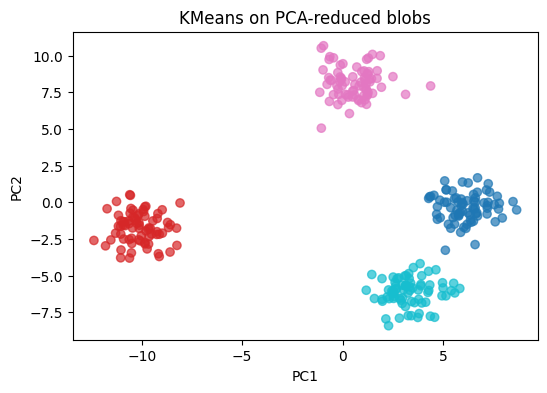

In [48]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Xb, yb = make_blobs(n_samples=300, centers=4, random_state=42)
pca_blob = PCA(n_components=2).fit_transform(Xb)
km = KMeans(n_clusters=4, random_state=42).fit(pca_blob)
plt.figure(figsize=(6,4))
plt.scatter(pca_blob[:,0], pca_blob[:,1], c=km.labels_, cmap='tab10', alpha=0.7)
plt.title('KMeans on PCA-reduced blobs'); plt.xlabel('PC1'); plt.ylabel('PC2')

### A10. Kernel PCA (RBF) on moons dataset
Use sklearn's KernelPCA to separate non-linear structure.

Text(0, 0.5, 'KPC2')

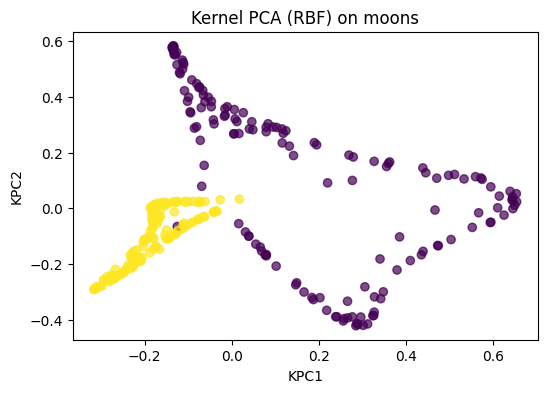

In [49]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

Xm, ym = make_moons(n_samples=300, noise=0.08, random_state=0)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
Xm_k = kpca.fit_transform(Xm)

plt.figure(figsize=(6,4))
plt.scatter(Xm_k[:,0], Xm_k[:,1], c=ym, alpha=0.7)
plt.title('Kernel PCA (RBF) on moons'); plt.xlabel('KPC1'); plt.ylabel('KPC2')

# Part B — Handling Imbalanced Classification (10 Questions)

Datasets: synthetic imbalanced (make_classification), Bank Churn (placeholder).

### B1. Create a synthetic imbalanced dataset

In [50]:
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=2000, n_features=10, n_informative=3, n_redundant=2,
                                   n_clusters_per_class=1, weights=[0.9,0.1], flip_y=0, random_state=42)

import numpy as np
np.bincount(y_imb)

array([1800,  200])

### B2. Baseline accuracy vs precision/recall
Train a dummy classifier or logistic regression and compare metrics.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Xtr, Xte, ytr, yte = train_test_split(X_imb, y_imb, test_size=0.3, random_state=0)
clf = LogisticRegression(max_iter=1000).fit(Xtr, ytr)
yhat = clf.predict(Xte)

accuracy_score(yte, yhat), precision_score(yte, yhat), recall_score(yte, yhat), f1_score(yte, yhat)

(0.9083333333333333,
 0.5538461538461539,
 0.5806451612903226,
 0.5669291338582677)

### B3. Random undersampling
Use imbalanced-learn RandomUnderSampler (if available) or manual undersample.

In [52]:
# Simple manual undersampling of majority class
from collections import Counter
from sklearn.utils import resample

X = Xtr.copy(); y = ytr.copy()
# combine
import numpy as np
data = np.hstack([X, y.reshape(-1,1)])
maj = data[y==0]
minr = data[y==1]
maj_down = resample(maj, replace=False, n_samples=len(minr), random_state=42)
bal = np.vstack([maj_down, minr])
X_bal = bal[:,:-1]; y_bal = bal[:,-1]

clf2 = LogisticRegression(max_iter=1000).fit(X_bal, y_bal)
yhat2 = clf2.predict(Xte)
accuracy_score(yte, yhat2), precision_score(yte, yhat2), recall_score(yte, yhat2), f1_score(yte, yhat2)

(0.8816666666666667, 0.46616541353383456, 1.0, 0.6358974358974359)

### B4. SMOTE oversampling (imblearn)
If imbalanced-learn is installed, demonstrate SMOTE usage.

In [53]:
try:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=42)
    X_sm, y_sm = sm.fit_resample(Xtr, ytr)
    print('After SMOTE:', np.bincount(y_sm))
except Exception as e:
    print('imblearn not installed. To use SMOTE, run: pip install imbalanced-learn')

After SMOTE: [1262 1262]


### B5. Tomek Links / ENN cleaning (concept + code if imblearn present)

In [54]:
try:
    from imblearn.under_sampling import TomekLinks
    tl = TomekLinks()
    X_tl, y_tl = tl.fit_resample(Xtr, ytr)
    print('After TomekLinks:', np.bincount(y_tl))
except Exception as e:
    print('imblearn not available for TomekLinks')

After TomekLinks: [1237  138]


### B6. Logistic Regression on oversampled data

In [55]:
if 'X_sm' in globals():
    clf_sm = LogisticRegression(max_iter=1000).fit(X_sm, y_sm)
    yhat_sm = clf_sm.predict(Xte)
    accuracy_score(yte, yhat_sm), precision_score(yte, yhat_sm), recall_score(yte, yhat_sm), f1_score(yte, yhat_sm)
else:
    print('SMOTE not run; skip this step or install imbalanced-learn')

### B7. Winsorizing outlier-prone feature (example)
Demonstrate Winsorizing a synthetic 'salary' column.

In [56]:
import pandas as pd
np.random.seed(0)
salary = np.concatenate([np.random.normal(50000, 8000, size=500), np.array([5e6, 6e6, 7e6])])
s = pd.Series(salary)
def winsorize_series(s, lower_pct=0.01, upper_pct=0.99):
    lower = s.quantile(lower_pct)
    upper = s.quantile(upper_pct)
    return s.clip(lower, upper)

s_w = winsorize_series(s)
s.describe(), s_w.describe()

(count    5.030000e+02
 mean     8.528545e+04
 std      4.629998e+05
 min      2.781926e+04
 25%      4.448400e+04
 50%      4.966194e+04
 75%      5.541337e+04
 max      7.000000e+06
 dtype: float64,
 count      503.000000
 mean     49937.355653
 std       8016.297995
 min      31696.328610
 25%      44484.004151
 50%      49661.942787
 75%      55413.365320
 max      69052.481707
 dtype: float64)

### B8. Apply RobustScaler and compare distributions vs StandardScaler

Text(0.5, 1.0, 'RobustScaler (salary)')

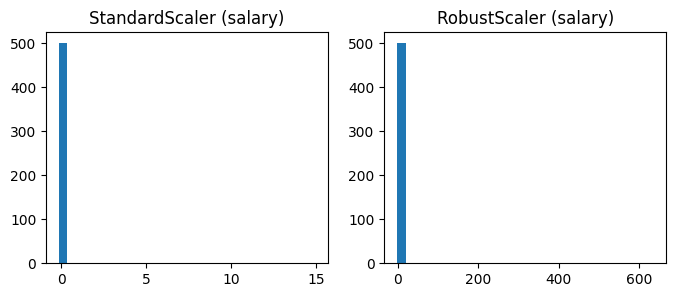

In [57]:
from sklearn.preprocessing import RobustScaler, StandardScaler
rs = RobustScaler()
ss = StandardScaler()

s_rs = rs.fit_transform(s.values.reshape(-1,1)).flatten()
s_ss = ss.fit_transform(s.values.reshape(-1,1)).flatten()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(s_ss, bins=30); plt.title('StandardScaler (salary)')
plt.subplot(1,2,2)
plt.hist(s_rs, bins=30); plt.title('RobustScaler (salary)')

### B9. Manual F1-score function

In [58]:
def manual_f1(y_true, y_pred):
    tp = ((y_true==1) & (y_pred==1)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    if tp+fp==0 or tp+fn==0:
        return 0.0
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)
    if prec+rec == 0:
        return 0.0
    return 2*(prec*rec)/(prec+rec)

# quick test
manual_f1(yte, yhat), f1_score(yte, yhat)

(np.float64(0.5669291338582677), 0.5669291338582677)

### B10. Pipeline: scaling + resampling + modeling
Use sklearn pipeline; if imblearn available, use `imblearn.pipeline` for resampling step.

In [59]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))])
pipe.fit(Xtr, ytr)
y_pipe = pipe.predict(Xte)
accuracy_score(yte, y_pipe), precision_score(yte, y_pipe), recall_score(yte, y_pipe), f1_score(yte, y_pipe)

(0.905, 0.5409836065573771, 0.532258064516129, 0.5365853658536586)

# Part C — Feature Engineering & Preprocessing (5 Questions)
Datasets: Titanic, Bank Churn (placeholder).

### C1. Create interaction/binary features (family size, child indicator) — Titanic

In [60]:
t = titanic.copy()
t['family_size'] = t['sibsp'].fillna(0) + t['parch'].fillna(0) + 1
t['is_child'] = (t['age'] < 18).astype(int)
t[['sibsp','parch','family_size','age','is_child']].head()

,sibsp,parch,family_size,age,is_child
0,1,0,2,22.0,0
1,1,0,2,38.0,0
2,0,0,1,26.0,0
3,1,0,2,35.0,0
4,0,0,1,35.0,0


### C2. Encoding categorical variables
Use OneHotEncoder for embeddings or pandas.get_dummies.

In [61]:
t_small = t[['sex','class','embarked']].copy()
# Convert categorical columns to object type before filling NaN
for col in t_small.select_dtypes('category').columns:
  t_small[col] = t_small[col].astype('object')
t_small = t_small.fillna('missing')
t_enc = pd.get_dummies(t_small, drop_first=True)
t_enc.head()

,sex_male,class_Second,class_Third,embarked_Q,embarked_S,embarked_missing
0,True,False,True,False,True,False
1,False,False,False,False,False,False
2,False,False,True,False,True,False
3,False,False,False,False,True,False
4,True,False,True,False,True,False


In [62]:
!pip install imbalanced-learn

### C3. Split dataset into features/target and train/test sets (Bank Churn placeholder)
_If you have the CSV, upload it to Colab and update the path._

In [63]:
# Placeholder: simulate bank churn data
from sklearn.datasets import make_classification
X_bank, y_bank = make_classification(n_samples=1000, n_features=12, n_informative=6, weights=[0.8,0.2], random_state=42)
from sklearn.model_selection import train_test_split
Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(X_bank, y_bank, test_size=0.25, random_state=42)
Xb_tr.shape, Xb_te.shape, np.bincount(y_bank)

((750, 12), (250, 12), array([797, 203]))

### C4. Handling missing values in a pipeline (Imputer + Scaler)

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipe_impute = Pipeline([('im', SimpleImputer(strategy='median')), ('sc', StandardScaler())])
X_sample = np.array([[1,2,np.nan],[4,np.nan,6],[7,8,9]], dtype=float)
pipe_impute.fit_transform(X_sample)

array([[-1.22474487, -1.22474487,  0.        ],
       [ 0.        ,  0.        , -1.22474487],
       [ 1.22474487,  1.22474487,  1.22474487]])

### C5. Custom transformer for scikit-learn pipeline
Example: add interaction features transformer.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class FamilyFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, sibsp_idx=0, parch_idx=1):
        self.sibsp_idx = sibsp_idx
        self.parch_idx = parch_idx
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        fs = X[:, self.sibsp_idx] + X[:, self.parch_idx] + 1
        return np.hstack([X, fs.reshape(-1,1)])

# quick test with synthetic array
A = np.array([[1,0,3],[0,2,1],[1,1,2]])
FamilyFeatures(0,1).fit_transform(A)

array([[1, 0, 3, 2],
       [0, 2, 1, 3],
       [1, 1, 2, 3]])

# Part D — General AI/ML Workflow & Project Lifecycle (5 Questions)

### D1. Loading multiple CSVs and concatenating
Split Iris into two CSVs (train/test) and load+concat.

In [66]:
# Save two small CSVs from Iris and reload to demonstrate concatenation
iris_df = iris.frame
iris_df.iloc[:100].to_csv('iris_part1.csv', index=False)
iris_df.iloc[100:].to_csv('iris_part2.csv', index=False)

df1 = pd.read_csv('iris_part1.csv')
df2 = pd.read_csv('iris_part2.csv')
df_concat = pd.concat([df1, df2], axis=0, ignore_index=True)
df_concat.shape

(150, 5)

### D2. Save a trained model with pickle and load for inference

In [67]:
import pickle
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000).fit(X_iris, y_iris)
with open('/content/iris_lr.pkl', 'wb') as f:
    pickle.dump(lr, f)

# Load back
with open('/content/iris_lr.pkl','rb') as f:
    lr2 = pickle.load(f)
lr2.predict(X_iris[:5])

array([0, 0, 0, 0, 0])

### D3. Track model metrics in a CSV log

In [68]:
import pandas as pd
metrics = {'model':['logreg_iris'],'accuracy':[accuracy_score(y_iris, lr2.predict(X_iris))]}
mdf = pd.DataFrame(metrics)
mdf.to_csv('/content/model_metrics_log.csv', index=False)
mdf

,model,accuracy
0,logreg_iris,0.973333


### D4. Simulate simple model drift detection
Shift distribution of a feature and compute performance drop.

In [69]:
# Original performance on X_bank test (placeholder model from earlier pipe)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=0).fit(Xb_tr, yb_tr)
base_acc = rf.score(Xb_te, yb_te)

# Create drifted test by shifting one feature
Xb_te_drift = Xb_te.copy()
Xb_te_drift[:,0] += 2.0  # shift
drift_acc = rf.score(Xb_te_drift, yb_te)
base_acc, drift_acc

(0.916, 0.888)

### D5. Automating retraining (example function)
A simple function to retrain when drift detected.

In [70]:
def retrain_if_drift(model, X_val, y_val, threshold_drop=0.05):
    base = model.score(X_val, y_val)
    # simulate new data (in practice fetch new labeled batch)
    X_new = X_val.copy(); X_new[:,0] += 0.5
    new_score = model.score(X_new, y_val)
    if base - new_score >= threshold_drop:
        # retrain (example)
        model.fit(X_val, y_val)
        return True, base, new_score
    return False, base, new_score

retrain_if_drift(rf, Xb_te, yb_te)

(False, 0.916, 0.908)